In [1]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the database into the pandas dataframe

humidity_df = pd.read_csv('humidity.csv')
pressure_df = pd.read_csv('pressure.csv')
temperature_df = pd.read_csv('temperature.csv')
weather_description_df = pd.read_csv('weather_description.csv')
wind_direction_df = pd.read_csv('wind_direction.csv')
wind_speed_df = pd.read_csv('wind_speed.csv')

In [3]:
#Extracting the datetime since its the most common data point

humidity = humidity_df[['datetime', 'Houston']]
pressure = pressure_df[['datetime', 'Houston']]
temperature = temperature_df[['datetime', 'Houston']]
weather_description = weather_description_df[['datetime', 'Houston']]
wind_direction = wind_direction_df[['datetime', 'Houston']]
wind_speed = wind_speed_df[['datetime', 'Houston']]

In [4]:
wind_speed.head()

,datetime,Houston
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1.0
2,2012-10-01 14:00:00,1.0
3,2012-10-01 15:00:00,1.0
4,2012-10-01 16:00:00,1.0


In [5]:
weather_df = (weather_description.merge(humidity, on = 'datetime')
             .merge(pressure, on = 'datetime')
             .merge(temperature, on = 'datetime')
             .merge(wind_direction, on = 'datetime')
             .merge(wind_speed, on = 'datetime')
             )
weather_df.columns = ['Datetime', 'Description', 'Humidity', 'Pressure', 'Temperature', 'Wind_Direction', 'Wind_Speed'] 
weather_df.head()

,Datetime,Description,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,sky is clear,93.0,1009.0,288.270000,270.0,1.0
2,2012-10-01 14:00:00,sky is clear,92.0,1008.0,288.297576,268.0,1.0
3,2012-10-01 15:00:00,sky is clear,90.0,1008.0,288.334343,265.0,1.0
4,2012-10-01 16:00:00,sky is clear,89.0,1008.0,288.371111,263.0,1.0


In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        45253 non-null  object 
 1   Description     45252 non-null  object 
 2   Humidity        45132 non-null  float64
 3   Pressure        45244 non-null  float64
 4   Temperature     45250 non-null  float64
 5   Wind_Direction  45251 non-null  float64
 6   Wind_Speed      45250 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [7]:
#Checking the amount of missing values
weather_df.isnull().sum()

Datetime            0
Description         1
Humidity          121
Pressure            9
Temperature         3
Wind_Direction      2
Wind_Speed          3
dtype: int64

In [8]:
#Checking the percentage of missing values
weather_df.isnull().mean()*100

Datetime          0.000000
Description       0.002210
Humidity          0.267386
Pressure          0.019888
Temperature       0.006629
Wind_Direction    0.004420
Wind_Speed        0.006629
dtype: float64

In [9]:
#Since the amount of missing values is very minute, so dropping all of them
weather_df.dropna(inplace=True)

In [10]:
weather_df.isnull().sum()

Datetime          0
Description       0
Humidity          0
Pressure          0
Temperature       0
Wind_Direction    0
Wind_Speed        0
dtype: int64

In [11]:
weather_df.describe()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
count,45126.000000,45126.000000,45126.000000,45126.000000,45126.000000
mean,74.069561,1019.617693,294.234321,154.348380,2.960045
std,18.584102,8.051679,7.746500,95.483251,1.893034
min,12.000000,982.000000,267.570000,0.000000,0.000000
25%,61.000000,1014.000000,289.420000,82.000000,2.000000
50%,78.000000,1018.000000,295.690000,151.000000,3.000000
75%,88.000000,1025.000000,299.700000,200.000000,4.000000
max,100.000000,1052.000000,312.910000,360.000000,15.000000


In [12]:
weather_df.columns

Index(['Datetime', 'Description', 'Humidity', 'Pressure', 'Temperature',
       'Wind_Direction', 'Wind_Speed'],
      dtype='object')

In [13]:
weather_df['Description'].unique()

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain', 'haze', 'mist',
       'fog', 'thunderstorm with light rain',
       'thunderstorm with heavy rain', 'light intensity drizzle',
       'thunderstorm', 'proximity thunderstorm', 'thunderstorm with rain',
       'shower rain', 'proximity shower rain', 'proximity moderate rain',
       'heavy intensity rain', 'drizzle', 'dust', 'smoke',
       'very heavy rain', 'light snow',
       'proximity thunderstorm with rain', 'squalls',
       'thunderstorm with light drizzle', 'thunderstorm with drizzle',
       'heavy intensity shower rain', 'sand', 'heavy intensity drizzle',
       'volcanic ash'], dtype=object)

In [16]:
weather_df['Description'].nunique()

33

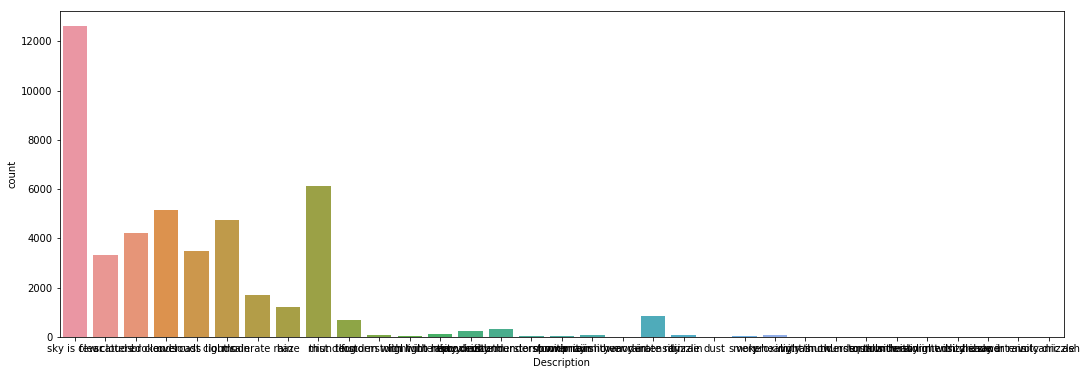

In [14]:
plt.figure(figsize = (18,6))
sns.countplot(x="Description", data=weather_df)

In [15]:
#Amount of unqiue data points is too much to make plots
weather_df['Description'].value_counts().sort_values(ascending = False)

sky is clear                        12613
mist                                 6109
broken clouds                        5163
light rain                           4724
scattered clouds                     4228
overcast clouds                      3469
few clouds                           3307
moderate rain                        1701
haze                                 1201
heavy intensity rain                  858
fog                                   701
proximity thunderstorm                337
thunderstorm                          218
light intensity drizzle                95
very heavy rain                        79
proximity shower rain                  79
drizzle                                63
thunderstorm with light rain           53
thunderstorm with rain                 28
thunderstorm with heavy rain           26
smoke                                  19
shower rain                            14
proximity thunderstorm with rain       12
light snow                        

In [17]:
# A Clear weather is more frequent in Houston Texas

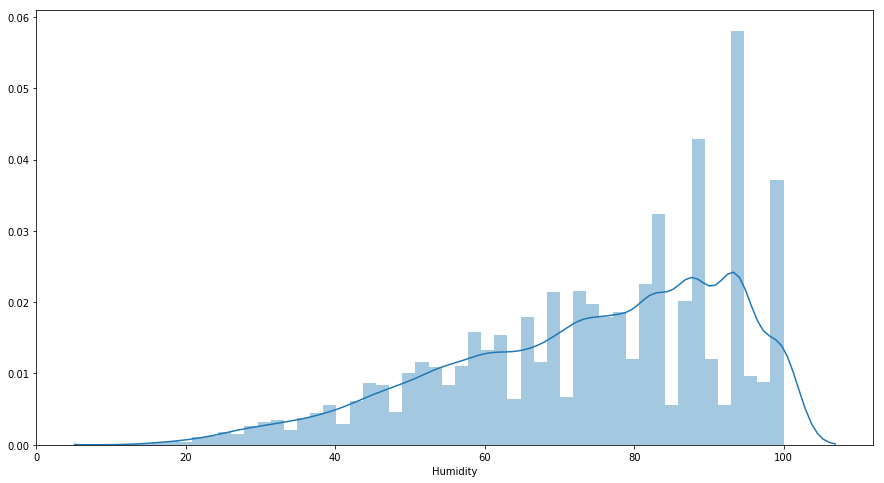

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Humidity'], kde=True)

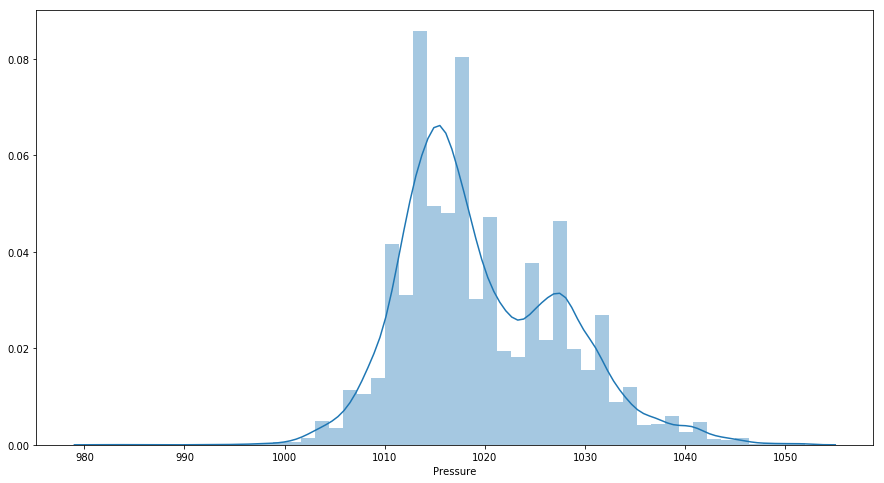

In [22]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Pressure'], kde=True)

In [23]:
#Both Humidity and Pressure don't really follow a normal distribution

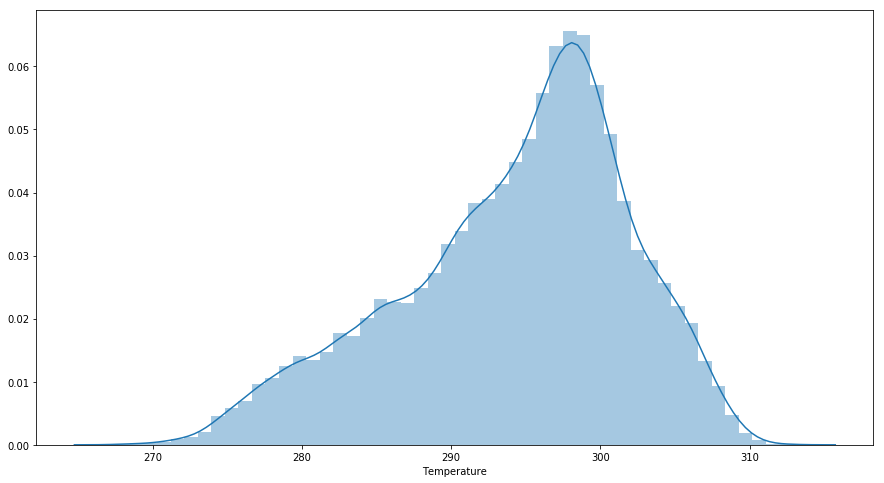

In [24]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Temperature'], kde=True)

In [ ]:
# Temperature on the oher hand follows a normal distribution